In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [9]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

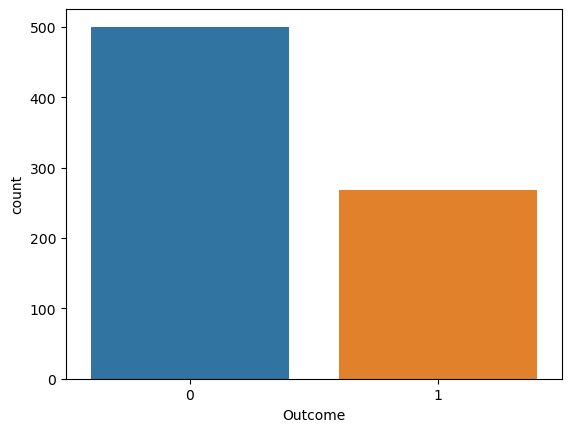

In [12]:
sns.countplot(x='Outcome', data=df)
plt.show()

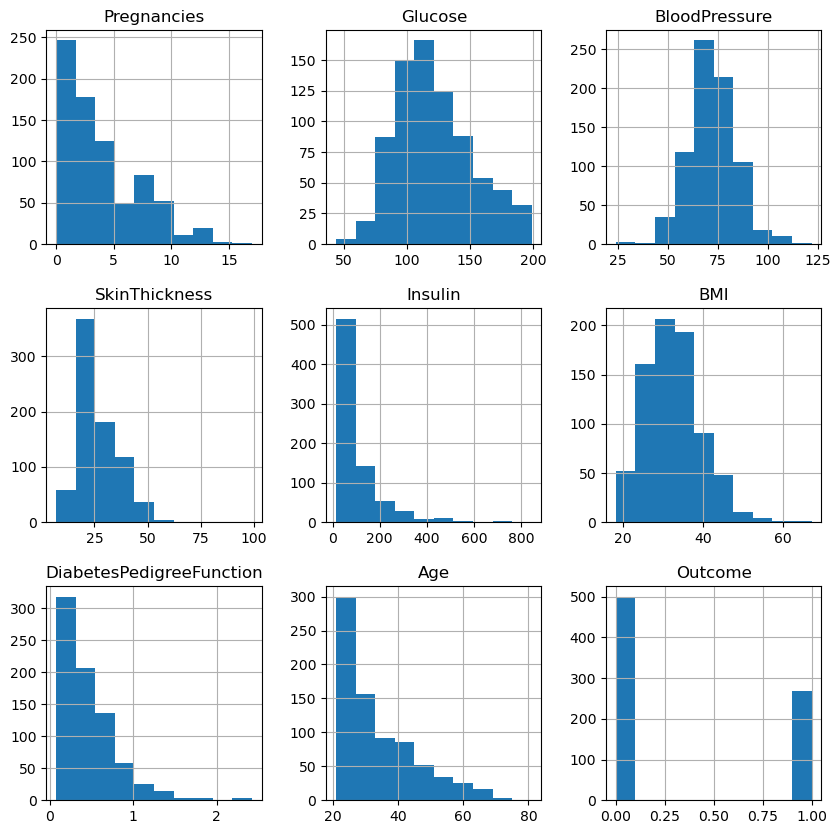

In [14]:
df.hist(bins=10, figsize=(10,10))
plt.show()

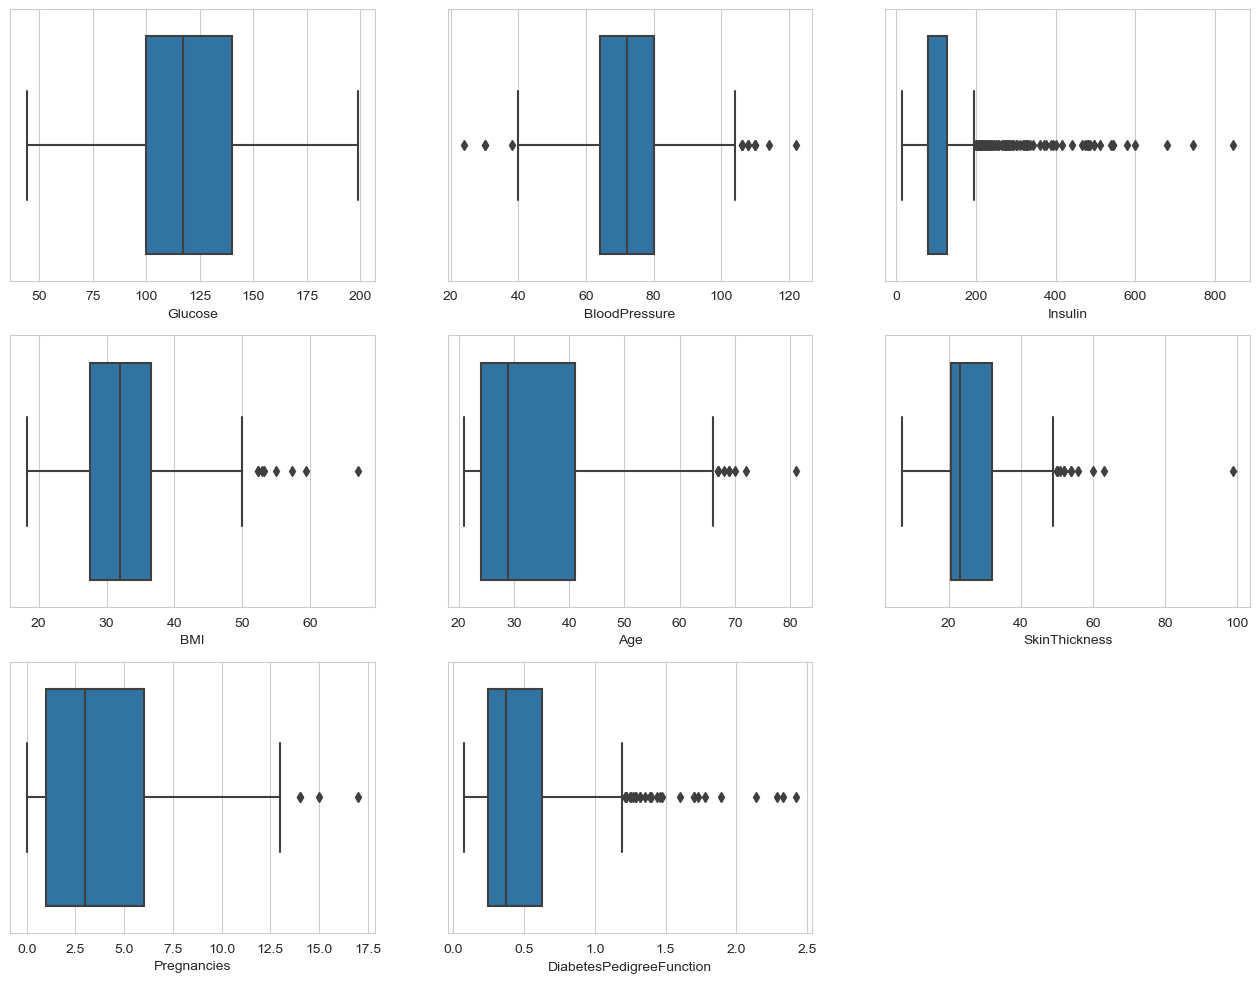

In [15]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

plt.show()

<Axes: >

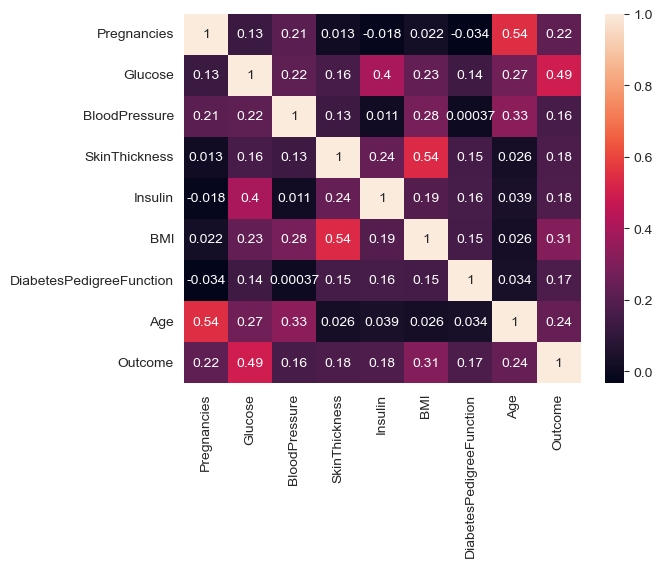

In [16]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop(['Outcome'], axis=1)
y= df['Outcome']
bestfeatures = SelectKBest(score_func = chi2, k=4)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [18]:
data_sf = df.drop(['DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness'], axis = 1)
data_sf.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome'], dtype='object')

[0.10938271 0.2445677  0.09862373 0.08316264 0.07704107 0.14096019
 0.11085387 0.13540809]


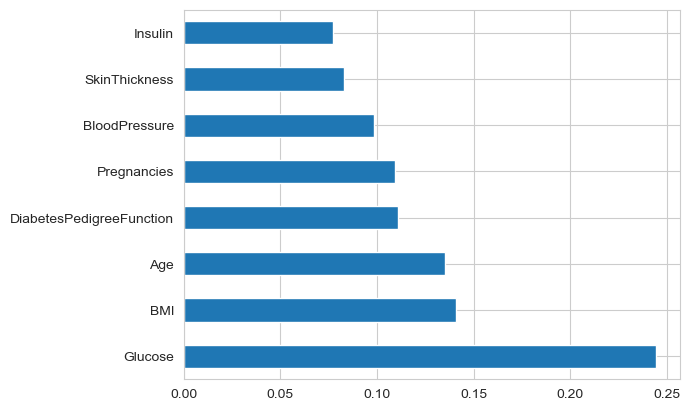

In [21]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [24]:
from sklearn.preprocessing import QuantileTransformer

x= data_sf
quantile = QuantileTransformer()
X = quantile.fit_transform(x)
df_new = quantile.transform(x)
df_new = pd.DataFrame(X)

df_new.columns=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']
df_new.head()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.747718,0.810300,0.380052,0.591265,0.889831,1.0
1,0.232725,0.091265,0.380052,0.213168,0.558670,0.0
2,0.863755,0.956975,0.380052,0.077575,0.585398,1.0
3,0.232725,0.124511,0.662973,0.284224,0.000000,0.0
4,0.000000,0.721643,0.834420,0.926988,0.606258,1.0


<Axes: xlabel='Insulin'>

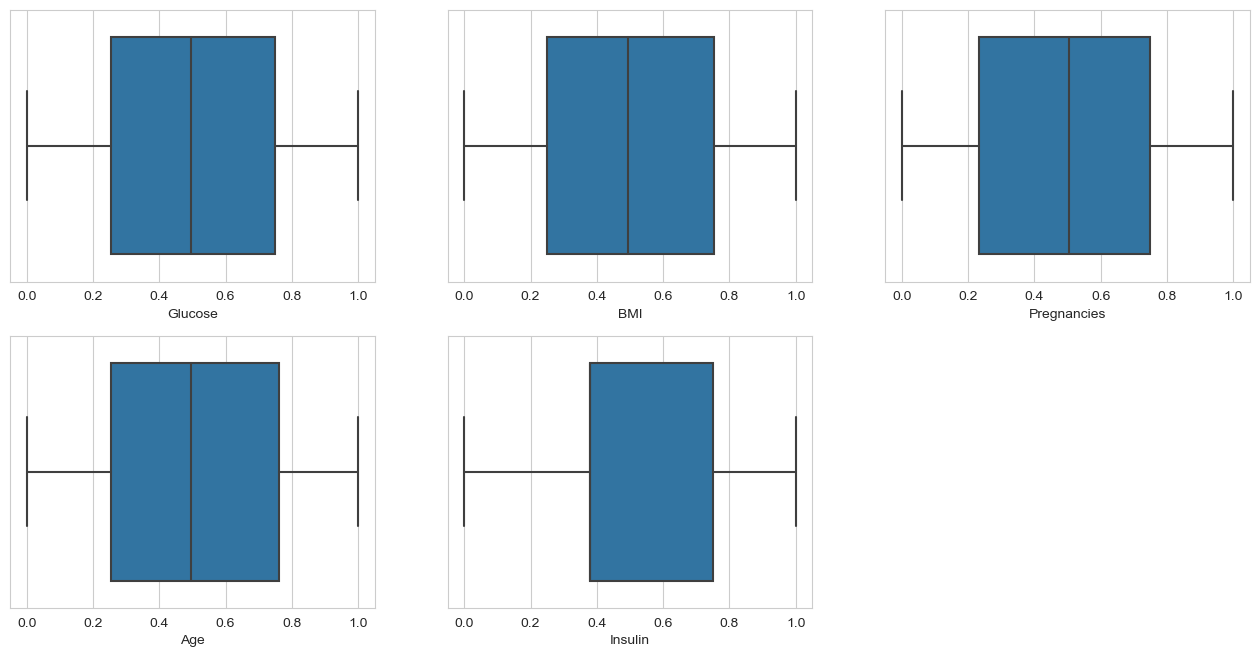

In [25]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['Insulin'],data=df_new)

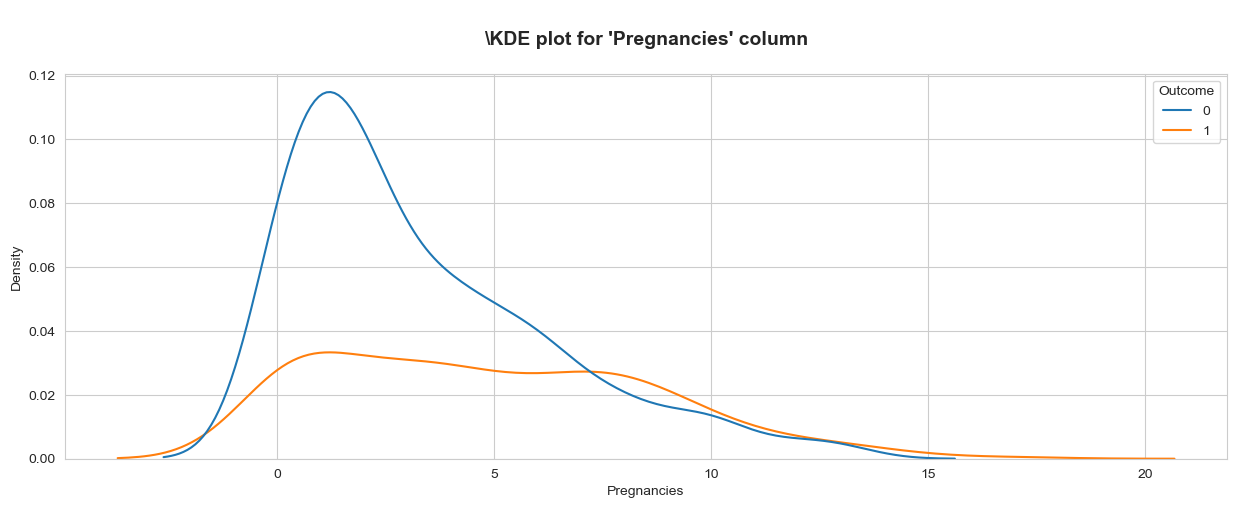

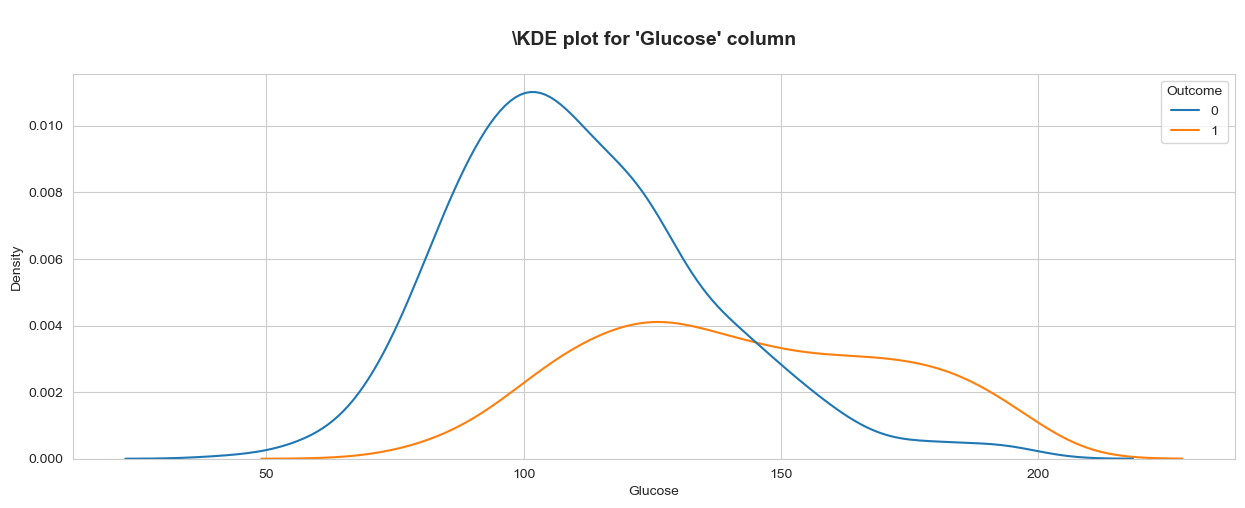

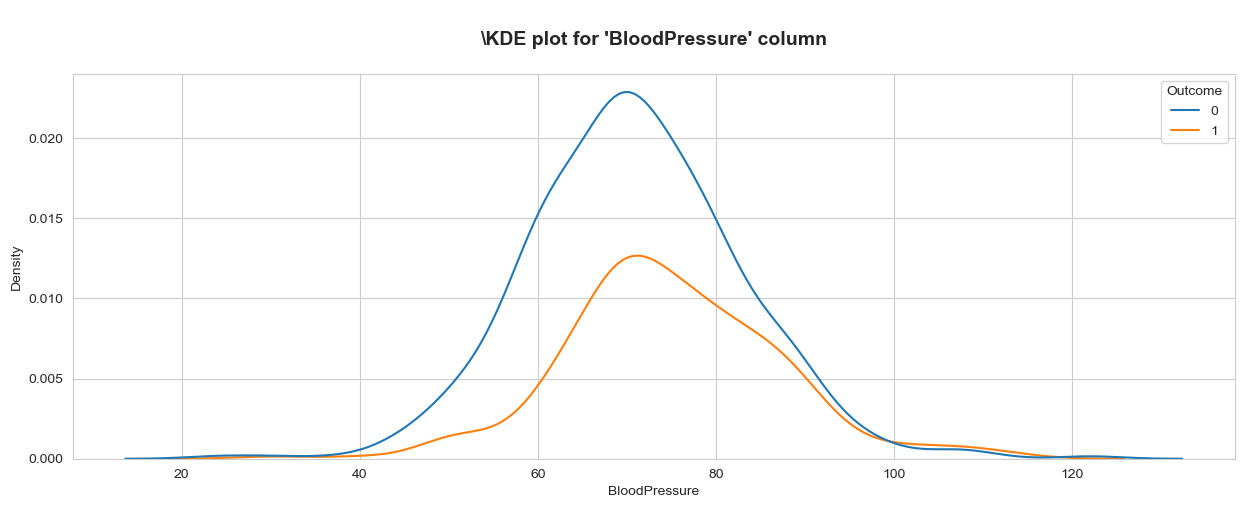

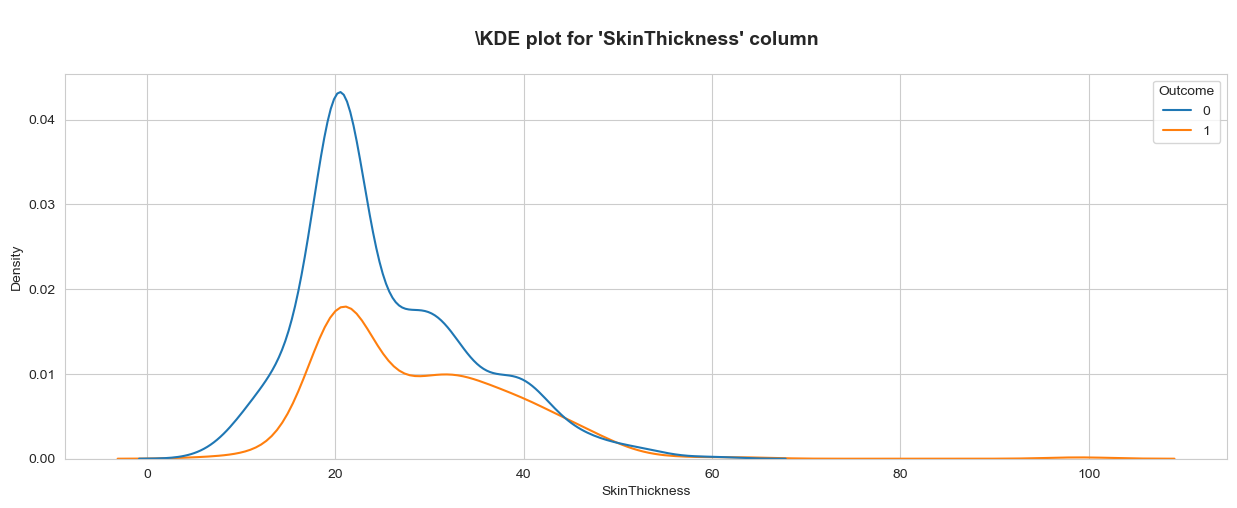

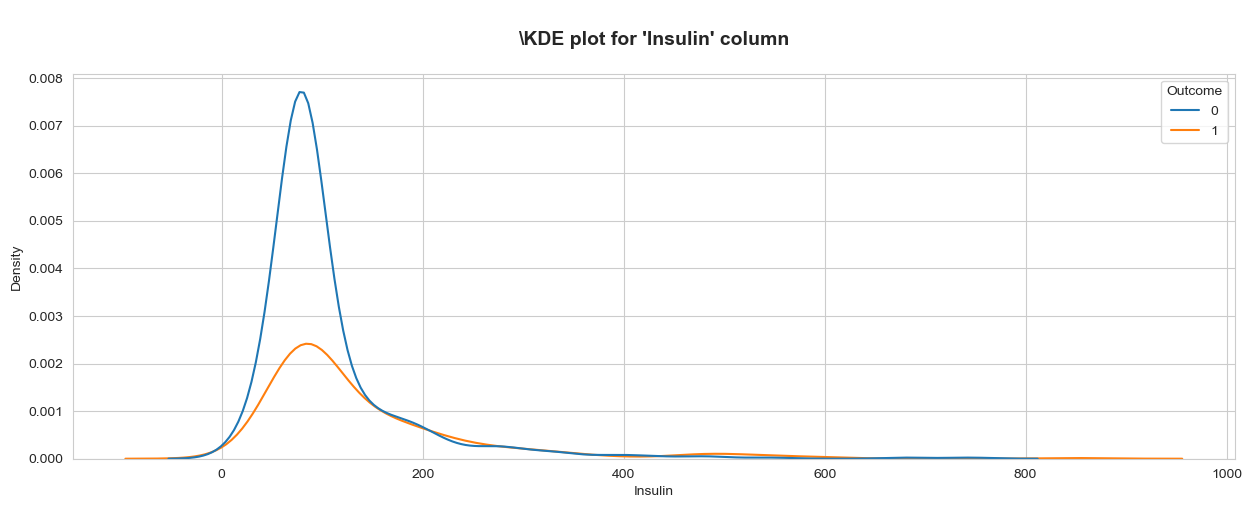

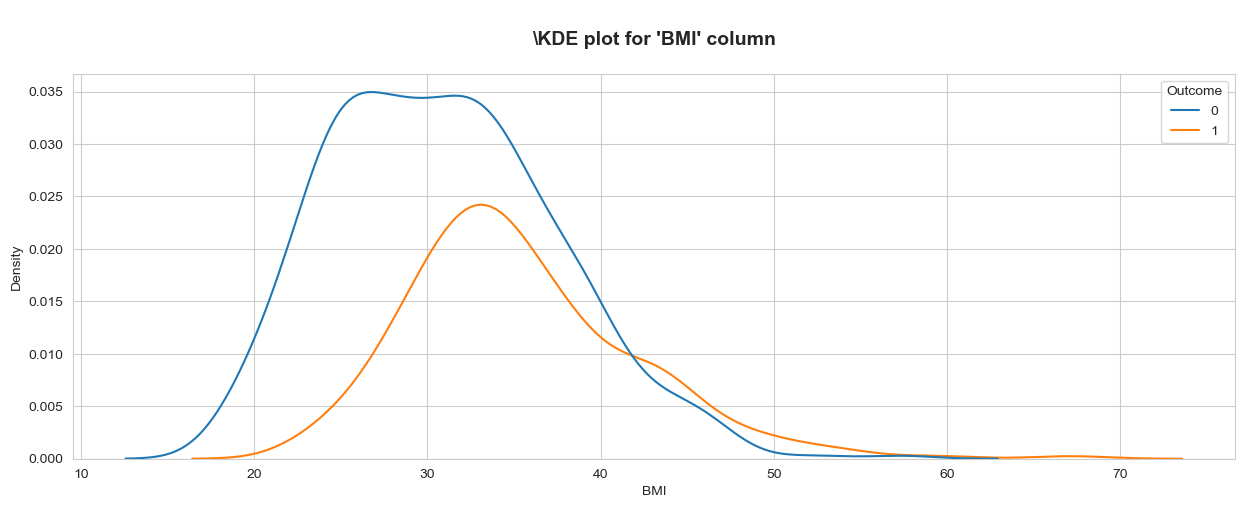

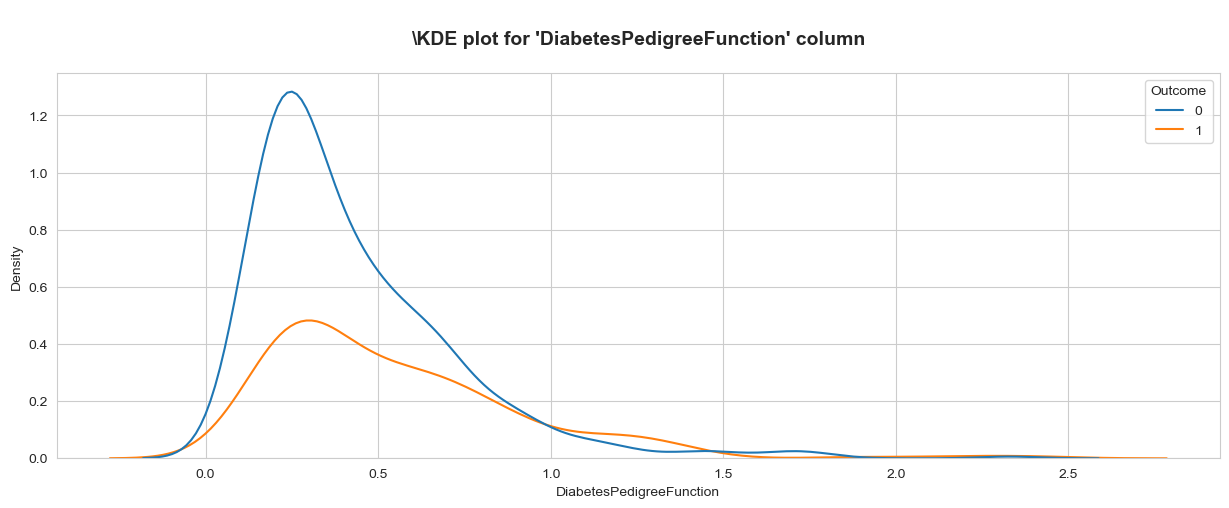

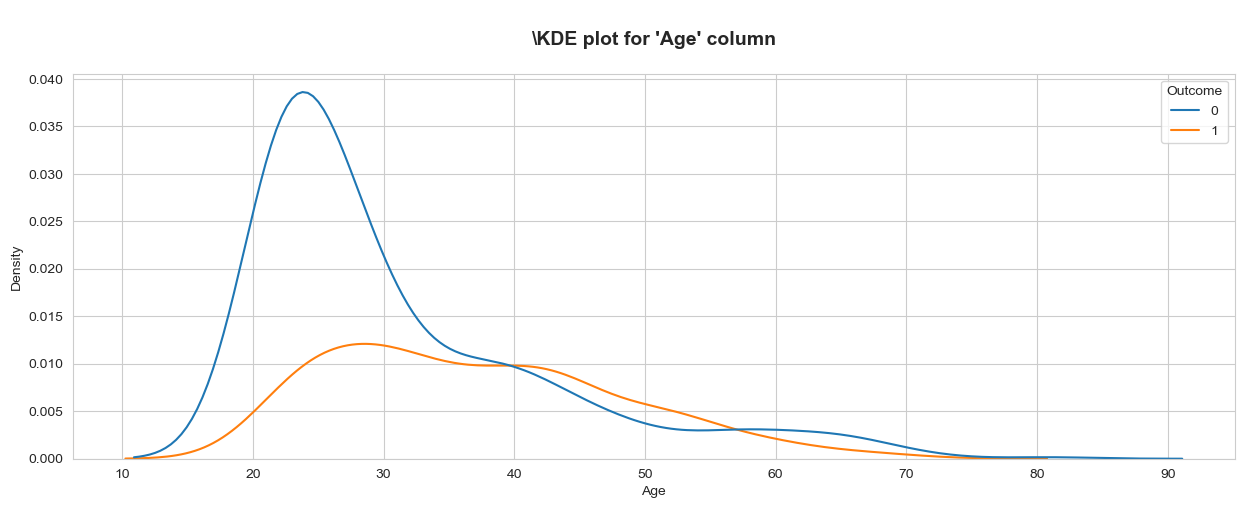

In [28]:
col1= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for c in col1:
    plt.figure(figsize = (15,5))
    sns.kdeplot(x=df[c], hue = df.Outcome)
    plt.title(f"\n\KDE plot for '{c}' column\n", size =14, fontweight='bold')
    plt.show()

In [29]:
X = df_new.drop(['Outcome'], axis =1)
y=df_new['Outcome']
X.head()

,Pregnancies,Glucose,Insulin,BMI,Age
0,0.747718,0.810300,0.380052,0.591265,0.889831
1,0.232725,0.091265,0.380052,0.213168,0.558670
2,0.863755,0.956975,0.380052,0.077575,0.585398
3,0.232725,0.124511,0.662973,0.284224,0.000000
4,0.000000,0.721643,0.834420,0.926988,0.606258


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
results = {}

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier
knn = KN(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [38]:
from sklearn import metrics

KNN_accuracy = metrics.accuracy_score(y_test, knn_y_pred)
KNN_precision = metrics.precision_score(y_test, knn_y_pred)
KNN_recall = metrics.f1_score(y_test, knn_y_pred)
KNN_f1 = metrics.f1_score(y_test, knn_y_pred)
KNN_error_rate = 1- KNN_accuracy

results["KNN"] = {"accuracy": KNN_accuracy,
                   "precision" : KNN_precision, 
                   "recall" : KNN_recall, 
                   "f1_score" : KNN_f1, 
                   "error_rate" : KNN_error_rate 
                   }

In [39]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)
RF_y_pred = RF.predict(X_test)

In [41]:
RF_accuracy = metrics.accuracy_score(y_test, RF_y_pred)
RF_precision = metrics.precision_score(y_test, RF_y_pred)
RF_recall = metrics.recall_score(y_test, RF_y_pred)
RF_f1 = metrics.f1_score(y_test, RF_y_pred)
RF_error_rate = 1 - RF_accuracy

results["RF"] = {"accuracy": RF_accuracy, 
                "precision": RF_precision, 
                "recall": RF_recall, 
                "f1_score": RF_f1, 
                "error_rate":RF_error_rate}

In [43]:
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_y_pred = DT.predict(X_test)

In [44]:
DT_accuracy = metrics.accuracy_score(y_test, DT_y_pred)
DT_precision = metrics.precision_score(y_test, DT_y_pred)
DT_recall = metrics.recall_score(y_test, DT_y_pred)
DT_f1 = metrics.f1_score(y_test, DT_y_pred)
DT_error_rate = 1 - RF_accuracy

results["DT"] = {"accuracy": DT_accuracy, 
                "precision": DT_precision, 
                "recall": DT_recall, 
                "f1_score": DT_f1, 
                "error_rate":DT_error_rate}

In [45]:
from sklearn.linear_model import LogisticRegression 
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)

In [46]:
LR_accuracy = metrics.accuracy_score(y_test, LR_y_pred)
LR_precision = metrics.precision_score(y_test, LR_y_pred)
LR_recall = metrics.recall_score(y_test, LR_y_pred)
LR_f1 = metrics.f1_score(y_test, LR_y_pred)
LR_error_rate = 1 - RF_accuracy

results["LR"] = {"accuracy": LR_accuracy, 
                "precision": LR_precision, 
                "recall": LR_recall, 
                "f1_score": LR_f1, 
                "error_rate":LR_error_rate}

In [48]:
from sklearn.naive_bayes import GaussianNB 
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_y_pred = GNB.predict(X_test)

In [51]:
GNB_accuracy = metrics.accuracy_score(y_test, GNB_y_pred)
GNB_precision = metrics.precision_score(y_test, GNB_y_pred)
GNB_recall = metrics.recall_score(y_test, GNB_y_pred)
GNB_f1 = metrics.f1_score(y_test, GNB_y_pred)
GNB_error_rate = 1 - GNB_accuracy

results["GNB"] = {"accuracy": GNB_accuracy, 
                "precision": GNB_precision, 
                "recall": GNB_recall, 
                "f1_score": GNB_f1, 
                "error_rate": GNB_error_rate}

In [54]:
from sklearn.svm import SVC 
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_y_pred = SVM.predict(X_test)

In [55]:
SVM_accuracy = metrics.accuracy_score(y_test, SVM_y_pred)
SVM_precision = metrics.precision_score(y_test, SVM_y_pred)
SVM_recall = metrics.recall_score(y_test, SVM_y_pred)
SVM_f1 = metrics.f1_score(y_test, SVM_y_pred)
SVM_error_rate = 1 - SVM_accuracy

results["GNB"] = {"accuracy": SVM_accuracy, 
                "precision":SVM_precision, 
                "recall": SVM_recall, 
                "f1_score": SVM_f1, 
                "error_rate": SVM_error_rate}

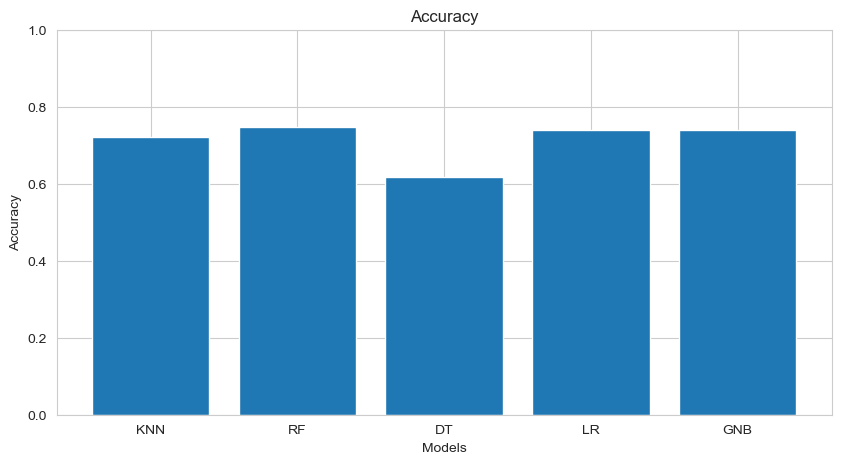

In [56]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

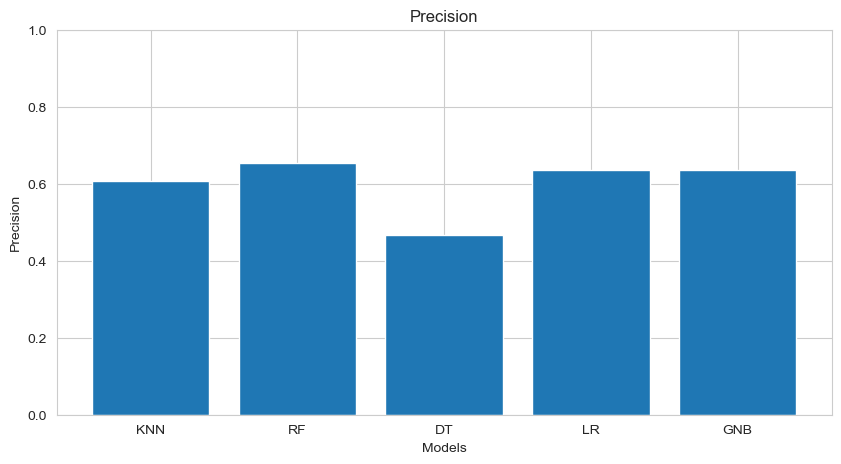

In [57]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0,1)
plt.show()

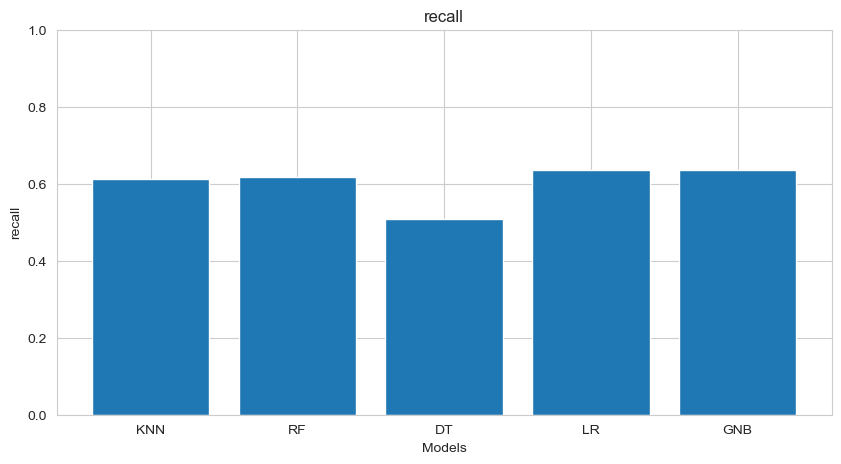

In [58]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("recall")
plt.xlabel("Models")
plt.ylabel("recall")
plt.ylim(0,1)
plt.show()

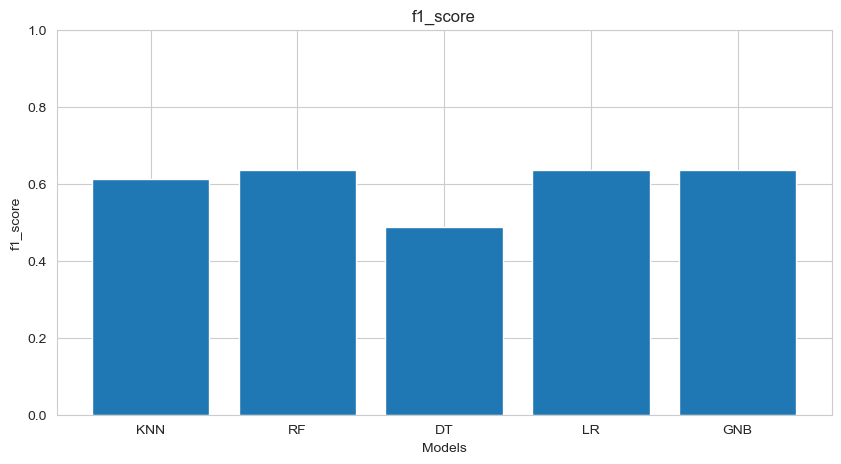

In [59]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("f1_score")
plt.xlabel("Models")
plt.ylabel("f1_score")
plt.ylim(0,1)
plt.show()

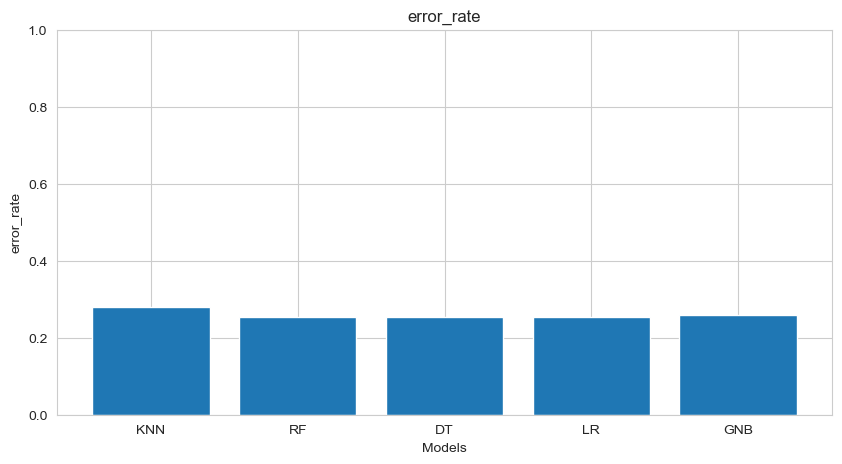

In [60]:
plt.figure(figsize=(10,5))
plt.bar(results.keys(), [result["error_rate"] for result in results.values()])
plt.title("error_rate")
plt.xlabel("Models")
plt.ylabel("error_rate")
plt.ylim(0,1)
plt.show()

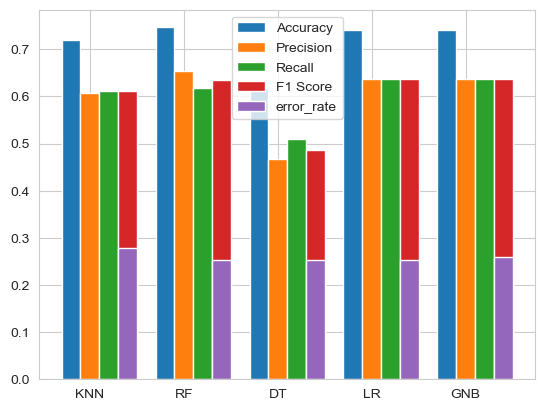

In [61]:
# extract metrics values
import numpy as np
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]
error_rate = [results[model]['error_rate'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')
plt.bar(index + 3 * bar_width, error_rate, bar_width, label='error_rate')

plt.xticks(index + bar_width, list(results.keys()))
plt.legend()
plt.show()